In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 理解逻辑回归的对数损失函数

C:\Users\19942\AppData\Local\Temp\ipykernel_47080\562019633.py:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_47080\562019633.py:15: UserWarning: Glyph 36923 (\N{CJK UNIFIED IDEOGRAPH-903B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_47080\562019633.py:15: UserWarning: Glyph 36753 (\N{CJK UNIFIED IDEOGRAPH-8F91}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_47080\562019633.py:15: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_47080\562019633.py:15: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\19942\AppData\Local\Temp\ipykernel_47080\562019633.py:15: UserWarning: Glyph 20013 (\N{CJK 

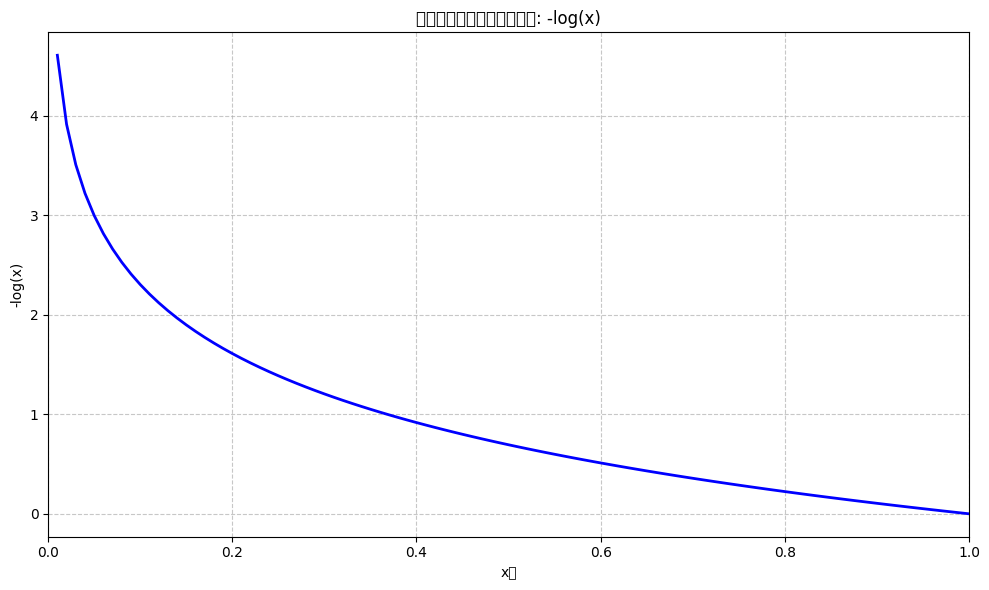

In [2]:
# 创建0到1之间的x值
x = np.linspace(0.01, 1, 100)  # 从0.01开始避免在x=0处的无穷大

# 计算-np.log(x)
y = -np.log(x)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('x值')
plt.ylabel('-log(x)')
plt.title('逻辑回归中的对数损失函数: -log(x)')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# 数据预处理

In [3]:
# 读取数据文件
df = pd.read_csv('C:\\Users\\19942\\Desktop\\wangdao\\code\\python_ml\\data\\breast-cancer-wisconsin.csv', header=None)


# any().any()的作用:
# 第一个any()检查每一列是否包含'?',返回一个布尔Series
# 第二个any()检查这个布尔Series中是否有任何True值
if (df == '?').any().any():
    print("存在'?'")

# 将'?'替换为NaN，以便使用pandas的空值检测函数
df = df.replace('?', np.nan)


# 显示每列缺失值的数量
print("\n每列缺失值数量:")
print(df.isna().sum())

# 显示数据的基本信息
print("\n数据基本信息:")
print(df.info())
# 删除包含缺失值的行
df_clean = df.dropna()
print(f"\n删除缺失值后的数据形状: {df_clean.shape}")

# 重命名列以便更容易理解
columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
           'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
           'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df_clean.columns = columns

# 查看数据的基本统计信息
print("\n数据的基本统计信息:")
print(df_clean.describe())

# 将目标变量转换为二分类问题（2为良性，4为恶性）
print("\n类别分布:")
# 将类别2和4映射为'良性'和'恶性'后显示分布
print(df_clean['Class'].map({2: '良性', 4: '恶性'}).value_counts())


# 准备特征和目标变量
X = df_clean.drop(['ID', 'Class'], axis=1)  # 删除ID列和目标变量
y = df_clean['Class'].map({2: '良性', 4: '恶性'})  # 将类别2和4映射为'良性'和'恶性'。 


存在'?'

每列缺失值数量:
0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       683 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

删除缺失值后的数据形状: (683, 11)

数据的基本统计信息:
                 ID  Clump Thickness  Uniformity of Cell Size  \
count  6.830000e+02       683.000000               683.000000   
mean   1.076720e+06         4.442167                 3.150805   
st

# 划分训练测试集，训练评估模型

In [4]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

# 使用逻辑回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 创建逻辑回归模型
# 使用较小的C值增加正则化强度，并使用L2正则化
model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=1000)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

# 评估模型
print("\n模型评估:")
print(f"准确率: {accuracy_score(y_test, y_pred):.4f}")

# 查看y_pred的数据类型和前5个预测值
print(f"y_pred的数据类型: {type(y_pred)}\nshape={y_pred.shape}")
print(f"前5个预测值: {y_pred[0:5]}")



训练集大小: (546, 9)
测试集大小: (137, 9)

模型评估:
准确率: 0.9124
y_pred的数据类型: <class 'numpy.ndarray'>
shape=(137,)
前5个预测值: ['恶性' '恶性' '良性' '良性' '良性']
